In [1]:
"""
This code explains which of the independent variables are important to compute \
dependent variable. I have taken pima-indians-diabetes.csv which I had downloaded from \
https://www.kaggle.com/kumargh/pimaindiansdiabetescsv?select=pima-indians-diabetes.csv

First step is to read the dataset and see how many input columns it has which is predictor values \ 
or feature values and output variable or response variable
"""
"""
For the model to give good result one needs to see the below points
-------------------------------------------------------------------
1.) Each independent variable must holds linear relationship with the dependent variable
2.) These independent variable should not hold linear relationship among themself else problem of multicolinearity 
    will develop
3.) Variance of error should be constant. For good results it must have zero mean and constant variance
4.) Observations must be reliable i.e each observation or row must be genuine or has real source

If a dataset follows these properties then one will get good results

"""

## Use pandas to read the csv file

In [2]:
"""
if one looks carefully at the dataset column names is not defined, names are taken \
from kaggle link \
https://www.kaggle.com/kumargh/pimaindiansdiabetescsv?select=pima-indians-diabetes.csv%5Cn%5CnFirst
"""
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import pylab 
import scipy.stats as stats

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [3]:
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class_name']
diabetes_csv_file = pd.read_csv('pima-indians-diabetes.csv', names=columns)

In [4]:
# displaying first 5 rows
diabetes_csv_file.head(5)

,preg,plas,pres,skin,test,mass,pedi,age,class_name
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes_csv_file_copy = diabetes_csv_file.copy()
diabetes_csv_file_dmatrics = diabetes_csv_file.copy()
data = diabetes_csv_file_copy.drop(['age'], axis=1)
target = diabetes_csv_file['age']

## Removing those rows which are not significiant using H-Leverage

In [6]:
"""
For this one needs to plot influence from sm.graphics \
step 1: create diabetes model using target column and input features you \
        got after p-value
step 2: Draw influence_plot
In the plot one need to calculate the H Leverage value according to the formula 3*(k+1)/n
where k is the number of features or regressors
      n is number of observations
H_leverage = 3*(8+1)/768
           = 0.035 
Hence values or observation which has H leverage greater than 0.035 needs to be discarded           
"""
diabetics_model = smf.ols('age ~ preg + plas + pres + skin + test + mass + pedi + class_name', 
                          data=diabetes_csv_file).fit()
influence = diabetics_model.get_influence()

In [7]:
influence = influence.summary_frame()

In [8]:
# getting all those rows where H Leverage > 0.0234
data_frame_H_Leverage = influence[influence['hat_diag'] > 0.035] 

In [9]:
data_frame_H_Leverage

,dfb_Intercept,dfb_preg,dfb_plas,dfb_pres,dfb_skin,dfb_test,dfb_mass,dfb_pedi,dfb_class_name,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
4,-0.012935,-0.021720,-0.005811,-0.048103,-0.002925,-0.006636,0.028071,0.141032,0.012645,0.002992,0.736616,0.047277,0.164090,0.736394,0.164041
9,0.059582,0.008187,-0.009212,0.069527,0.007295,-0.002153,-0.130554,-0.014094,0.068552,0.002600,0.727777,0.042303,0.152957,0.727552,0.152909
13,0.141936,-0.084315,-0.069243,-0.025412,-0.315142,0.878100,-0.075401,-0.153992,0.148168,0.099585,3.315376,0.075393,0.946715,3.337445,0.953017
45,0.049764,0.034039,-0.051584,0.016094,-0.031358,0.066971,-0.008756,-0.107486,-0.001220,0.002319,-0.726678,0.038021,-0.144467,-0.726452,-0.144422
58,-0.099217,-0.047850,0.048762,0.029051,-0.093067,-0.041450,0.070327,0.196699,-0.080724,0.006671,1.238542,0.037666,0.245032,1.238978,0.245118
193,0.000579,-0.005800,-0.000053,0.010603,0.003541,0.000465,-0.009332,-0.000814,0.000329,0.000023,-0.063136,0.049965,-0.014479,-0.063094,-0.014469
228,0.036784,-0.021295,-0.019958,0.008953,0.036109,-0.100976,-0.005226,-0.106708,0.053887,0.003238,-0.552240,0.087223,-0.170711,-0.551987,-0.170632
247,0.024043,0.009192,0.002869,-0.007853,0.037362,-0.079086,-0.039694,0.012484,0.023393,0.001046,-0.403362,0.054713,-0.097041,-0.403140,-0.096988
332,-0.002041,-0.046487,0.113179,-0.226197,-0.050511,-0.054519,0.136387,-0.042849,0.011754,0.010162,1.540943,0.037088,0.302420,1.542342,0.302695
349,0.077003,0.005670,-0.170065,0.027970,0.000249,0.018277,0.030946,-0.016508,0.107954,0.003938,0.921145,0.040095,0.188260,0.921053,0.188241


In [10]:
rows_h_leverage = list(data_frame_H_Leverage.index.values) 

In [11]:
"""
Some observation from the influence plot
Observation 1: Observation mentioned in rows_h_leverage are going out of the plot and hence we can \
discard them
"""
data_influence = data.drop(data.index[rows_h_leverage], axis=0)
target_influence = target.drop(target.index[rows_h_leverage], axis=0)

In [12]:
if (data_influence.shape[0] == target_influence.shape[0]):
    print("Both data and target contains same number of observation")
else:
    print("Recheck data and target before proceeding")

Both data and target contains same number of observation


In [13]:
# check the correlation among different input variables
data.corr()

,preg,plas,pres,skin,test,mass,pedi,class_name
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.173844
class_name,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,1.000000


In [14]:
"""
To check which features are important for the model we will calculate
p value for each of the independent variable and if value<0.05,
we can say that such variable is significant to calculate the output
"""
columns_data = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'class_name']
ols_model = sm.OLS(target_influence, 
                  data_influence[columns_data]).fit()

In [15]:
# see the summary of the model
ols_summary = ols_model.summary()
ols_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    age   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              1191.
Date:                Thu, 08 Oct 2020   Prob (F-statistic):                        0.00
Time:                        17:13:22   Log-Likelihood:                         -2748.1
No. Observations:                 750   AIC:                                      5512.
Df Residuals:                     742   BIC:                                      5549.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
preg           1.7229      0.109     15.849      0.000       1.509       1.936
plas           0.1120      0.012      9.729      0.000       0.089       0.135
pres           0.1463      0.019      7.625      0.000       0.109       0.184
skin          -0.0835      0.028     -2.998      0.003      -0.138      -0.029
test          -0.0103      0.004     -2.585      0.010      -0.018      -0.002
mass           0.1166      0.048      2.441      0.015       0.023       0.210
pedi           3.6078      1.185      3.043      0.002       1.280       5.935
class_name    -1.0966      0.825     -1.329      0.184      -2.716       0.523
==============================================================================
Omnibus:                      183.814   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              455.902
Skew:                           1.269   Prob(JB):                     1.00e-99
Kurtosis:                       5.855   Cond. No.                         611.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
"""
Some Observation while executing the above cell
Observation 1: R-squared > 0.8 for good fit but got only 0.487 and hence needs improvement
Observation 2: For any independent variable to be significiant, it must have p value < 0.05 and class_name have value greater
               than 0.05 and hence are not significiant
"""
modified_data = data_influence.drop(['class_name'], axis=1)

In [17]:
# again create OLS Model and get the summary. We need to see whether R**2 is improved or not
ols_modified_model = sm.OLS(target_influence, modified_data)
ols_modified_fit = ols_modified_model.fit()
ols_modified_summary = ols_modified_fit.summary()

In [18]:
ols_modified_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    age   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              1360.
Date:                Thu, 08 Oct 2020   Prob (F-statistic):                        0.00
Time:                        17:13:22   Log-Likelihood:                         -2749.0
No. Observations:                 750   AIC:                                      5512.
Df Residuals:                     743   BIC:                                      5544.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
preg           1.6997      0.107     15.833      0.000       1.489       1.910
plas           0.1077      0.011      9.740      0.000       0.086       0.129
pres           0.1520      0.019      8.118      0.000       0.115       0.189
skin          -0.0829      0.028     -2.976      0.003      -0.138      -0.028
test          -0.0104      0.004     -2.621      0.009      -0.018      -0.003
mass           0.1123      0.048      2.354      0.019       0.019       0.206
pedi           3.4980      1.183      2.956      0.003       1.175       5.821
==============================================================================
Omnibus:                      185.006   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              470.135
Skew:                           1.266   Prob(JB):                    8.15e-103
Kurtosis:                       5.938   Cond. No.                         608.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
ypred = ols_modified_fit.predict(modified_data)

In [20]:
ypred

0      40.151482
1      22.698903
2      48.008679
3      22.171760
5      35.820761
         ...    
763    37.865839
764    30.265567
765    33.202354
766    28.994482
767    24.303669
Length: 750, dtype: float64

In [21]:
# errors or residuals which is actual - predicted values
residuals = ols_modified_fit.resid_pearson

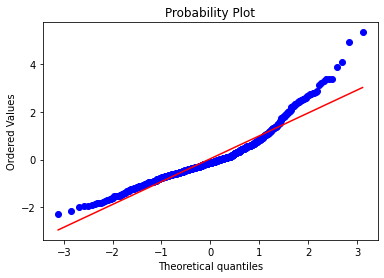

In [22]:
# if more blue lies on the red line then error us more symmetric distributed
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

Text(0.5, 1.0, 'Predicted vs Actual')

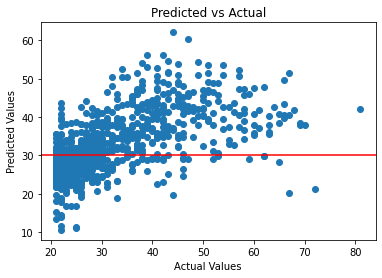

In [23]:
plt.scatter(target_influence, ypred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.axhline(y=30, color='red')
plt.title('Predicted vs Actual')

In [25]:
y, X = dmatrices('age ~ preg + plas + pres + skin + test + mass + pedi + class_name', diabetes_csv_file_dmatrics, return_type='dataframe')

In [36]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [37]:
vif

,VIF Factor,features
0,37.302031,Intercept
1,1.101311,preg
2,1.478792,plas
3,1.145758,pres
4,1.491295,skin
5,1.427238,test
6,1.364431,mass
7,1.079542,pedi
8,1.429844,class_name
